In [60]:
#Set current directory
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)
print(SCRIPT_DIR)

#Configuration
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          'xtick.direction': 'out',  
          'ytick.direction': 'out',  
          'xtick.minor.visible': True,  
          'ytick.minor.visible': True,
          'xtick.major.size': 9,
          'xtick.minor.size': 4.5,
          'ytick.major.size': 9,
          'ytick.minor.size': 4.5,
          'lines.linewidth': 1.75}
plt.rcParams.update(params)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\Daniel SB\Documents\GitHub


Using CAMB 1.3.6 installed at c:\Users\Daniel SB\anaconda3\envs\envcamb\lib\site-packages\camb
Note: redshifts have been re-sorted (earliest first)


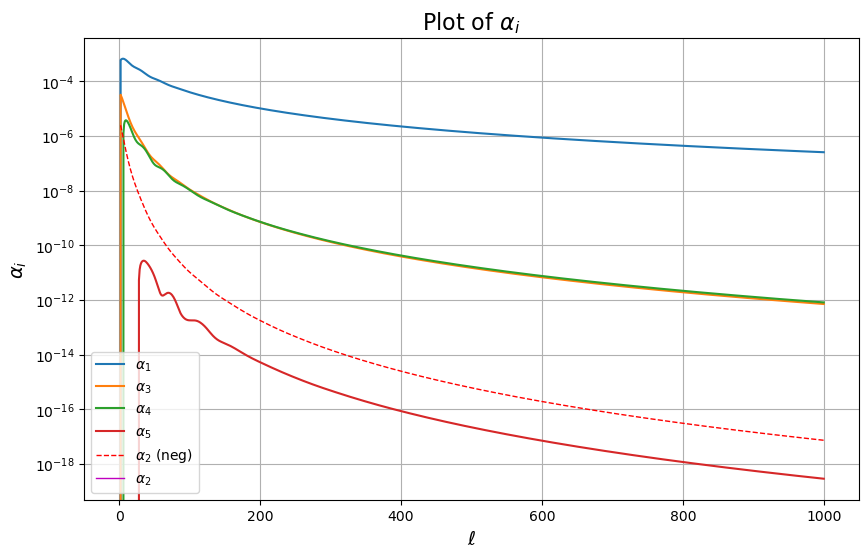

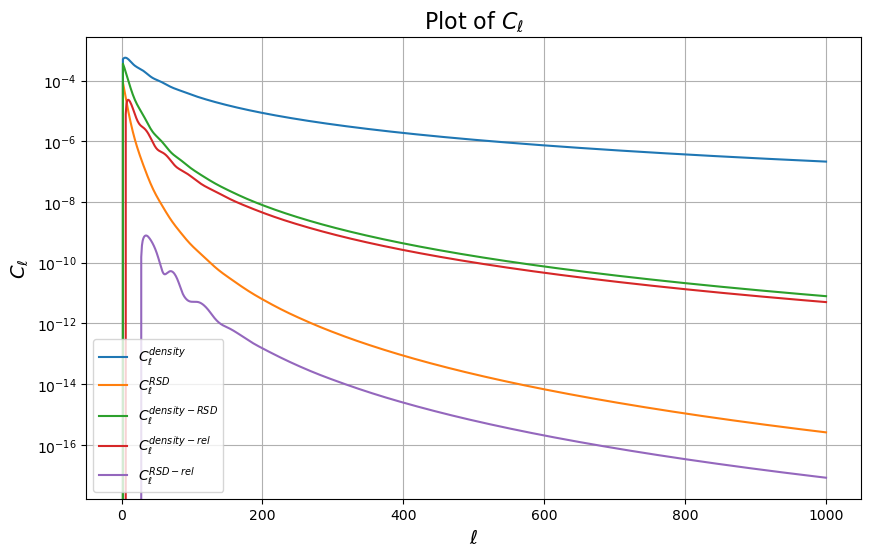

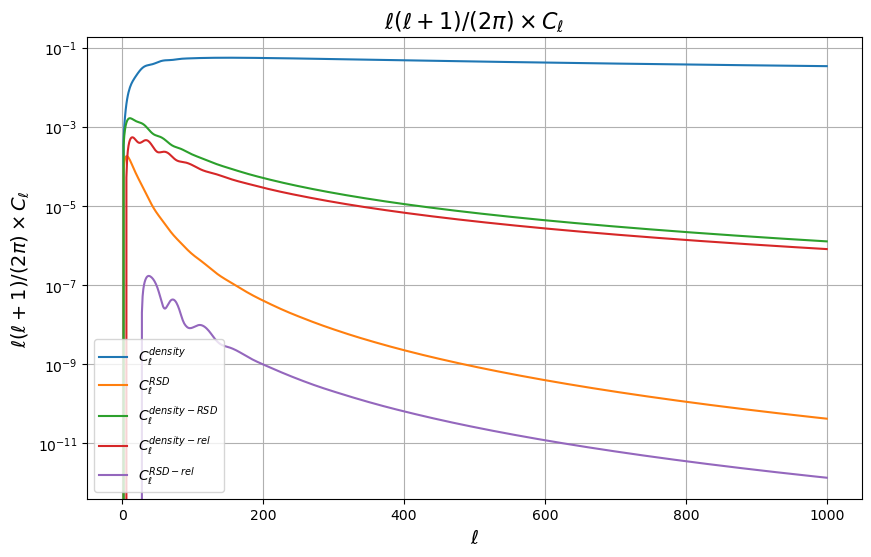

In [2]:
%run alphas_calculation.py

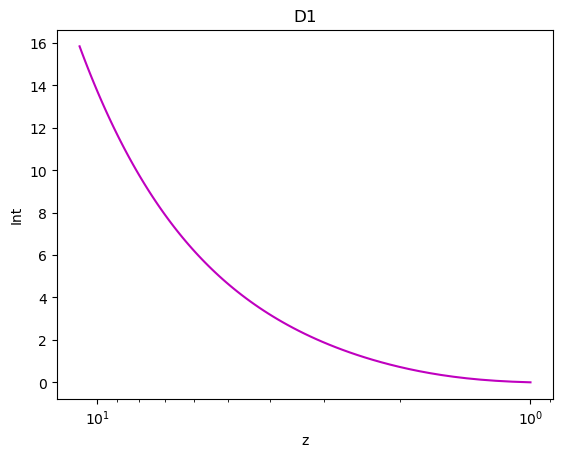

In [3]:
%run class_cosmo_quantities_old.py

In [1]:
# Define a parameter file out of the parameters used in alphas_calculation.py

params = {
    'Omega_m' : 0.31,
    'Omega_Lambda' : 0.69,
    'H_0' : 67.66,
    'ombh2' : 0.02236,
    'omch2' : 0.1200,
    'mnu' : 0.06,
    'omk' : 0,
    'tau' : 0.0544,
    'As' : 2.100549e-9,    
    'ns' : 0.9652,
    'r' : 0,
    'z' : 0.15,
    'sigma' : 0.02,
    'bias_F' : 1.,
    'bias_B' : 1.5,
    'lmax' : 1000
}

In [2]:
params

{'Omega_m': 0.31,
 'Omega_Lambda': 0.69,
 'H_0': 67.66,
 'ombh2': 0.02236,
 'omch2': 0.12,
 'mnu': 0.06,
 'omk': 0,
 'tau': 0.0544,
 'As': 2.100549e-09,
 'ns': 0.9652,
 'r': 0,
 'z': 0.15,
 'sigma': 0.02,
 'bias_F': 1.0,
 'bias_B': 1.5,
 'lmax': 1000}

In [3]:
from alphas_calculation import alphas

Using CAMB 1.3.6 installed at c:\Users\Daniel SB\anaconda3\envs\envcamb\lib\site-packages\camb


In [4]:
alpha_funcs = alphas(**params)

In [5]:
# Computes the alphas integrals and the Cells

alpha1_arr = alpha_funcs.calculate_alpha_1()

In [6]:
alpha_1, Cell1 = alpha1_arr

In [7]:
type(alpha_1), type(Cell1)

(numpy.ndarray, numpy.ndarray)

In [8]:
import numpy as np

alpha_loaded = np.load('alpha_integrals.npz')

In [9]:
alpha_1_loaded = alpha_loaded['alpha_1']

In [10]:
np.allclose(alpha_1, alpha_1_loaded)

True

In [11]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 2, 3, 4, 5])

np.outer(a,b)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [12]:
sol = np.outer(a,b).flatten()

In [13]:
sol

array([ 1,  2,  3,  4,  5,  2,  4,  6,  8, 10,  3,  6,  9, 12, 15,  4,  8,
       12, 16, 20,  5, 10, 15, 20, 25])

In [14]:
a[0]

1

In [15]:
sol = np.outer(a[0],b[0]).flatten()

In [16]:
sol

array([1])

In [17]:
np.transpose(np.array([sol,]*len(np.arange(10))))

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [18]:
# Define a parameter file out of the parameters used in alphas_calculation.py

params_signals = {
    'Omega_m' : 0.31,
    'Omega_Lambda' : 0.69,
    'H_0' : 67.66,
    'z' : [0.15],
    'bias_F' : [1.],
    'bias_B' : [1.5],
    'lmax' : 1000,
    'pop' : ['B', 'F']
}

In [19]:
from signals import Signals
import numpy as np

my_signals = Signals(**params_signals)

In [20]:
Cells_DD_new = my_signals.Cells_DD()

In [21]:
type(Cells_DD_new), np.shape(Cells_DD_new)

(numpy.ndarray, (3, 1, 1001))

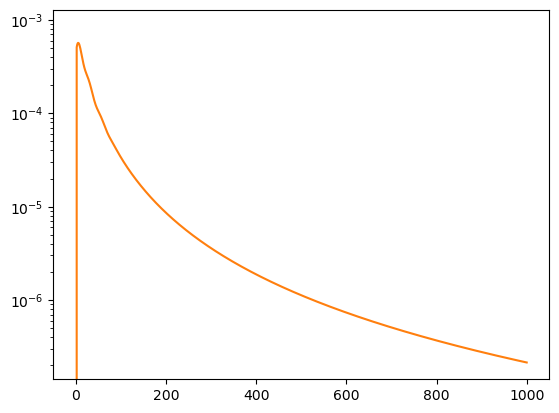

In [22]:
import matplotlib.pyplot as plt

plt.plot(Cells_DD_new[0])
plt.plot(Cell1)

plt.yscale('log')

In [23]:
s8int = alpha_funcs.sigma8()

Note: redshifts have been re-sorted (earliest first)


In [24]:
s8int(0.0)

array(0.81205691)

In [25]:
Cells_DD_new[0]

array([[0.00000000e+00, 0.00000000e+00, 7.62642094e-04, ...,
        3.23215985e-07, 3.22424255e-07, 3.21635205e-07]])

In [26]:
Cell1

array([0.00000000e+00, 0.00000000e+00, 5.08707829e-04, ...,
       2.15595891e-07, 2.15067781e-07, 2.14541458e-07])

In [27]:
s8int_ = my_signals.s8

In [28]:
s8int_(0.0)

array(0.81205691)

In [29]:
triu_idx = np.triu_indices(5)

triu_idx

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]),
 array([0, 1, 2, 3, 4, 1, 2, 3, 4, 2, 3, 4, 3, 4, 4]))

In [30]:
from signals import Signals
import numpy as np
import matplotlib.pyplot as plt

params_signals = {
    'Omega_m' : 0.31,
    'Omega_Lambda' : 0.69,
    'H_0' : 67.66,
    'z' : [0.15,0.25,0.35,0.45],
    'bias_F' : [1., 1.2, 1.4, 1.6],
    'bias_B' : [1.5, 1.7, 1.9, 2.1],
    'lmax' : 1000,
    'pop' : ['B', 'F']
}

In [31]:
my_signals_ = Signals(**params_signals)

In [32]:
Cells_density = my_signals_.Cells_DD()

In [33]:
np.shape(Cells_density)

(3, 10, 1001)

In [34]:
ell = np.arange(len(Cells_density[0,0]))


Text(0.5, 1.0, 'Brigth x Bright')

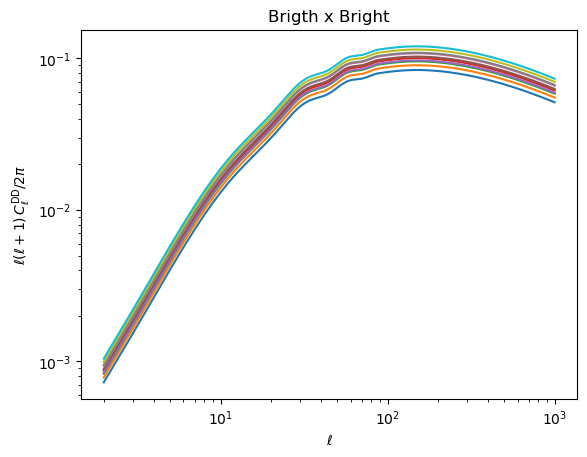

In [35]:
for k, Cell_z in enumerate(Cells_density[0]):
    plt.plot(ell[2:], ell[2:]*(ell[2:]+1) * Cell_z[2:] / (2*np.pi))

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)\,C_{\ell}^{\mathrm{DD}}/2\pi$')
plt.title('Brigth x Bright')

Text(0.5, 1.0, 'Brigth x Faint')

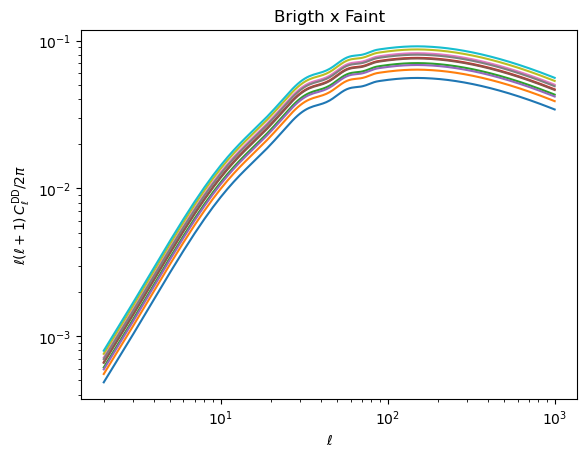

In [36]:
for k, Cell_z in enumerate(Cells_density[1]):
    plt.plot(ell[2:], ell[2:]*(ell[2:]+1) * Cell_z[2:] / (2*np.pi))

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)\,C_{\ell}^{\mathrm{DD}}/2\pi$')
plt.title('Brigth x Faint')

Text(0.5, 1.0, 'Faint x Faint')

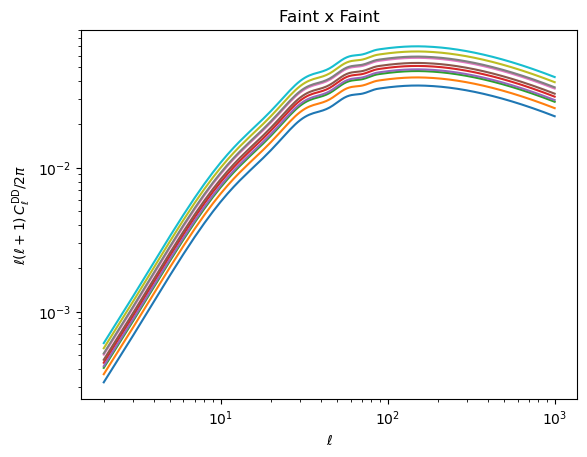

In [37]:
for k, Cell_z in enumerate(Cells_density[2]):
    plt.plot(ell[2:], ell[2:]*(ell[2:]+1) * Cell_z[2:] / (2*np.pi))

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)\,C_{\ell}^{\mathrm{DD}}/2\pi$')
plt.title('Faint x Faint')

In [38]:
np.outer([0.15, 0.25, 0.35],[0.15, 0.25, 0.35]).flatten()

array([0.0225, 0.0375, 0.0525, 0.0375, 0.0625, 0.0875, 0.0525, 0.0875,
       0.1225])

In [39]:
0.15*0.15

0.0225

In [40]:
0.25*0.25

0.0625

In [41]:
0.35*0.35

0.12249999999999998

In [42]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 2, 3, 4, 5])

c = np.outer(a,b)

print(c)

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


In [43]:
mask = np.triu(np.ones_like(c), k=0).astype(bool)
factors = c[mask]

print(factors)

[ 1  2  3  4  5  4  6  8 10  9 12 15 16 20 25]


In [44]:
alpha1 = np.array([1]*5)

result = alpha1[np.newaxis,:] * factors[:,np.newaxis]

In [45]:
result

array([[ 1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5],
       [ 4,  4,  4,  4,  4],
       [ 6,  6,  6,  6,  6],
       [ 8,  8,  8,  8,  8],
       [10, 10, 10, 10, 10],
       [ 9,  9,  9,  9,  9],
       [12, 12, 12, 12, 12],
       [15, 15, 15, 15, 15],
       [16, 16, 16, 16, 16],
       [20, 20, 20, 20, 20],
       [25, 25, 25, 25, 25]])

In [46]:
Cells_RR_new = my_signals_.Cells_RR()

In [47]:
type(Cells_RR_new), np.shape(Cells_RR_new)

(numpy.ndarray, (1, 10, 1001))

Text(0.5, 1.0, 'Total x Total')

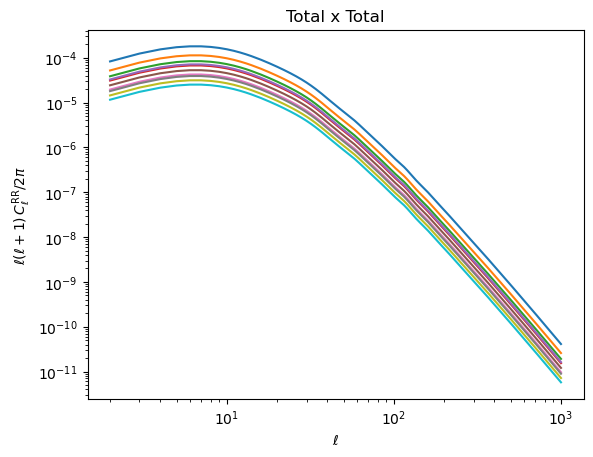

In [48]:
for k, Cell_z in enumerate(Cells_RR_new[0]):
    plt.plot(ell[2:], ell[2:]*(ell[2:]+1) * Cell_z[2:] / (2*np.pi))

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)\,C_{\ell}^{\mathrm{RR}}/2\pi$')
plt.title('Total x Total')

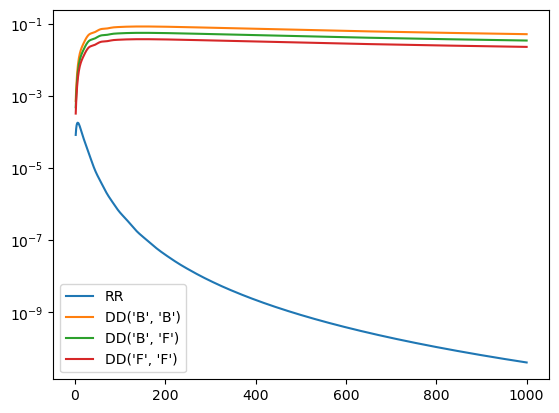

In [58]:
#Compare DD with RR for the same redshift

import itertools as it

plt.plot(ell[2:], ell[2:]*(ell[2:]+1) * Cells_RR_new[0,0,2:] / (2*np.pi), label='RR')

for k,_ in enumerate(Cells_density):
    plt.plot(ell[2:], ell[2:]*(ell[2:]+1) * Cells_density[k,0,2:] / (2*np.pi), label='DD'+str(list(it.combinations_with_replacement(params_signals['pop'], 2))[k]))

plt.yscale('log')
plt.xscale('log')

plt.legend()